<a href="https://colab.research.google.com/github/tiffhugh/DATA71200/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 Import Dataset

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
drug_consumption_quantified = fetch_ucirepo(id=373)

# data (as pandas dataframes)
X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets
drug_consumption_df = pd.concat([X, y], axis=1)

Step 2 Prepare Data

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
drug_consumption_quantified = fetch_ucirepo(id=373)

# data (as pandas dataframes)
X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets
drug_consumption_df = pd.concat([X, y], axis=1)

# Create binary classification for drug consumption(1- consumes drugs, 0- doesnt consumes drugs)
# 1- (Used last, Month, Week, Day), 0-(Never Used, Used..over a Decade,Last Decade, Year)
def change(x):
    if ((x == 'CL6') or (x == 'CL5') or (x == 'CL4')):
        return 1
    elif ((x == 'CL0') or (x == 'CL1') or (x == 'CL2') or (x == 'CL3')):
        return 0
    return x

columns_to_map = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']
# Apply the change function to specified columns
for column in columns_to_map:
    drug_consumption_df[column] = drug_consumption_df[column].apply(lambda x: change(x)).astype(int)

# Stimulants - caffeine, nicotine, amphet, coke, crack, meth
drug_consumption_df['stimulants'] = drug_consumption_df.apply(lambda x: int((x['caff']  + x['nicotine'] + x['coke'] + x['crack'] + x['meth'] )>0), axis=1)
# Depressants - alcohol, benzos, heroin
drug_consumption_df['depressants'] = drug_consumption_df.apply(lambda x: int((x['alcohol']  + x['benzos'] + x['heroin'] )>0), axis=1)
# Hallucinogens - Lsd, mushrooms, ketamine, ecstasy, cannabis
drug_consumption_df['hallucinogens'] = drug_consumption_df.apply(lambda x: int((x['lsd']  + x['mushrooms'] + x['ketamine'] + x['ecstasy'] + x['cannabis'] )>0), axis=1)

def combine_categories(row):
    categories = []
    if row['stimulants'] == 1:
        categories.append('stimulant')
    if row['depressants'] == 1:
        categories.append('depressant')
    if row['hallucinogens'] == 1:
        categories.append('hallucinogen')

    return '+'.join(categories) if categories else 'none'

drug_consumption_df['drug_category'] = drug_consumption_df.apply(combine_categories, axis=1)

# Drop the individual drug category columns and other original columns
drug_consumption_df.drop(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa', 'stimulants', 'depressants', 'hallucinogens'], axis=1, inplace=True)

print(drug_consumption_df)

          age   gender  education  country  ethnicity   nscore   escore  \
0     0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1    -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2     0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3    -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4     0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...       ...      ...        ...      ...        ...      ...      ...   
1880 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.12700   

       oscore   ascore   cscore  impuslive       ss  \
0    -0.58331 -0.91699 -0.00665   -0.21712 -

In [4]:
# Recode gender (1- Female, 0-Male)
def change(x):
    if (x == 0.48246):
        x = 1
    elif (x == -0.48246):
        x = 0
    return x
drug_consumption_df['gender'] = drug_consumption_df['gender'].apply(lambda x: change(x))
# Recode Education
def changeEducation(x):
  if (x == -2.43591):
    x = 0
  elif (x == -1.73790):
    x = 1
  elif (x == -1.43719):
    x = 2
  elif (x == -1.22751):
    x = 3
  elif (x == -0.61113):
    x = 4
  elif (x == -0.05921):
    x = 5
  elif (x == 0.45468):
    x = 6
  elif (x == 1.16365):
    x = 7
  elif (x == 1.98437):
    x = 8
  return x
drug_consumption_df['education'] = drug_consumption_df['education'].apply(lambda x: changeEducation(x))
#Recode Age
def changeAge(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x
drug_consumption_df['age'] = drug_consumption_df['age'].apply(lambda x: changeAge(x))

Step 1 Train Test Split

In [5]:
# Update target variables
feature_columns = ['age', 'gender', 'education', 'nscore', 'oscore', 'ascore', 'impuslive', 'ss']
target_column = ['drug_category']
X = drug_consumption_df[feature_columns]
y = drug_consumption_df[target_column]

In [ ]:
print(list(drug_consumption_df.columns))

['age', 'gender', 'education', 'country', 'ethnicity', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'ss', 'drug_category']


In [6]:
#Divide into a training set and a testing set
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution in the splits
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))

Train target distribution:
 drug_category                    
stimulant+depressant                 0.434350
stimulant+depressant+hallucinogen    0.387931
stimulant                            0.080239
stimulant+hallucinogen               0.053050
depressant                           0.021220
depressant+hallucinogen              0.009284
none                                 0.009284
hallucinogen                         0.004642
Name: proportion, dtype: float64
Test target distribution:
 drug_category                    
stimulant+depressant                 0.435013
stimulant+depressant+hallucinogen    0.387268
stimulant                            0.079576
stimulant+hallucinogen               0.053050
depressant                           0.021220
none                                 0.010610
depressant+hallucinogen              0.007958
hallucinogen                         0.005305
Name: proportion, dtype: float64


Step 3 Examine your target attribute

drug_category
stimulant+depressant                 819
stimulant+depressant+hallucinogen    731
stimulant                            151
stimulant+hallucinogen               100
depressant                            40
none                                  18
depressant+hallucinogen               17
hallucinogen                           9
Name: count, dtype: int64


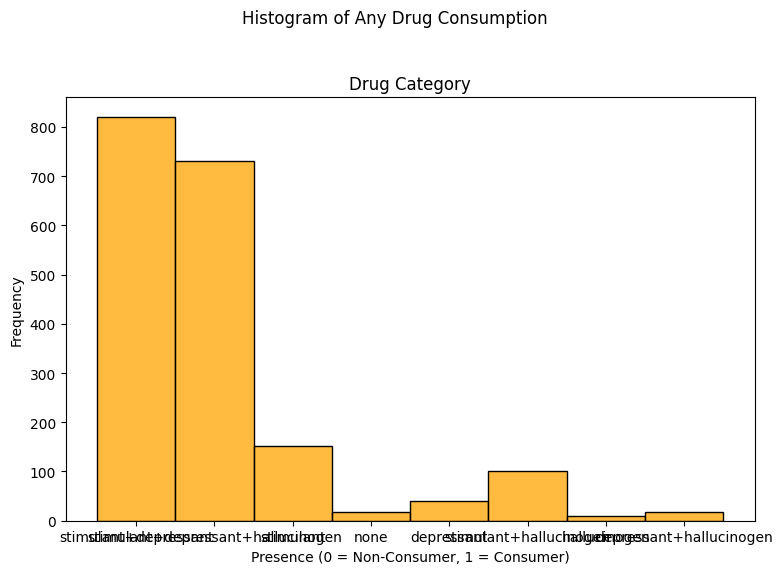

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

category_counts = drug_consumption_df['drug_category'].value_counts()

# Display the frequency counts
print(category_counts)


# Create a single histogram for the 'drug_category' attribute
plt.figure(figsize=(8, 6))

sns.histplot(drug_consumption_df['drug_category'], bins=2, kde=False, color='orange')
plt.title('Drug Category')
plt.xlabel('Presence (0 = Non-Consumer, 1 = Consumer)')
plt.ylabel('Frequency')

plt.suptitle('Histogram of Any Drug Consumption')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


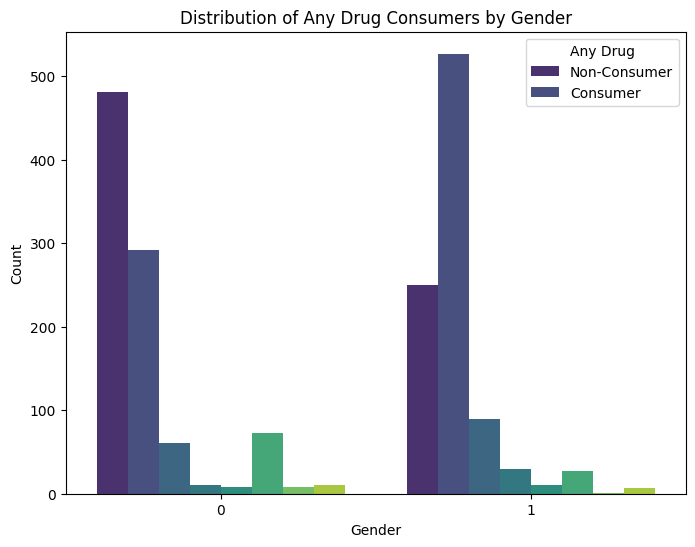

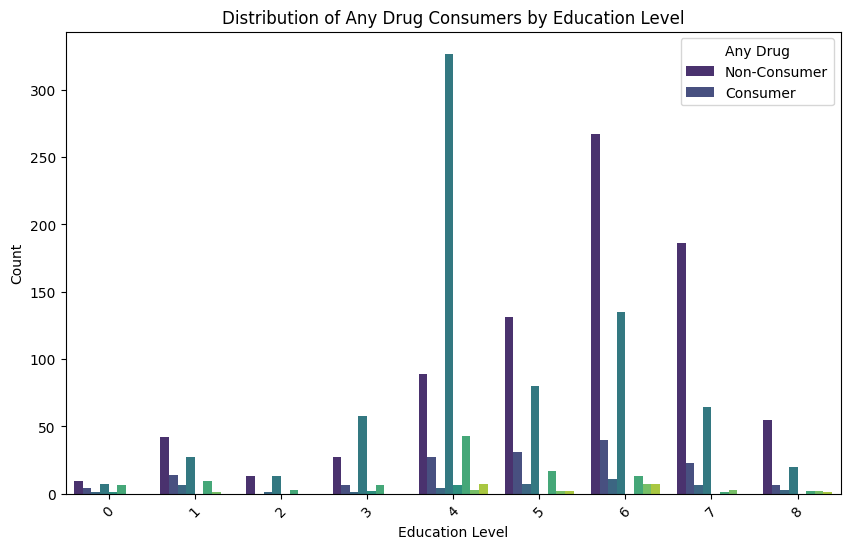

In [8]:
# Countplot of 'drug_category' across 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='drug_category', data=drug_consumption_df, palette='viridis')
plt.title('Distribution of Any Drug Consumers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Any Drug', loc='upper right', labels=['Non-Consumer', 'Consumer'])
plt.show()

# Countplot of 'drug_category' across 'education'
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='drug_category', data=drug_consumption_df, palette='viridis')
plt.title('Distribution of Any Drug Consumers by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Any Drug', loc='upper right', labels=['Non-Consumer', 'Consumer'])
plt.xticks(rotation=45)
plt.show()


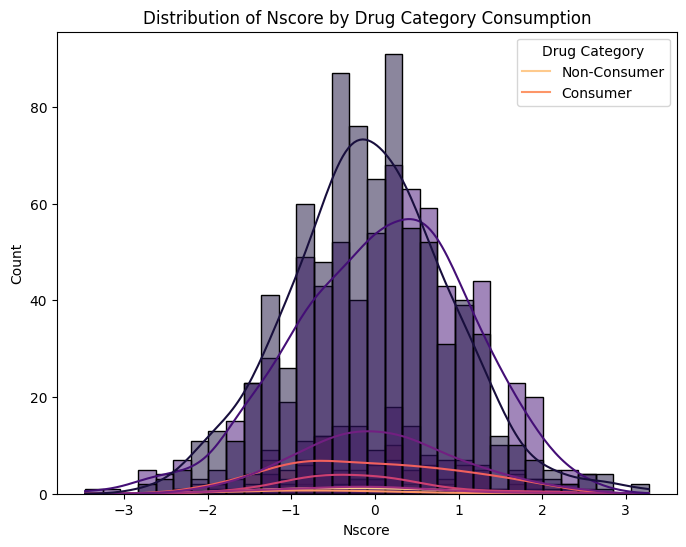

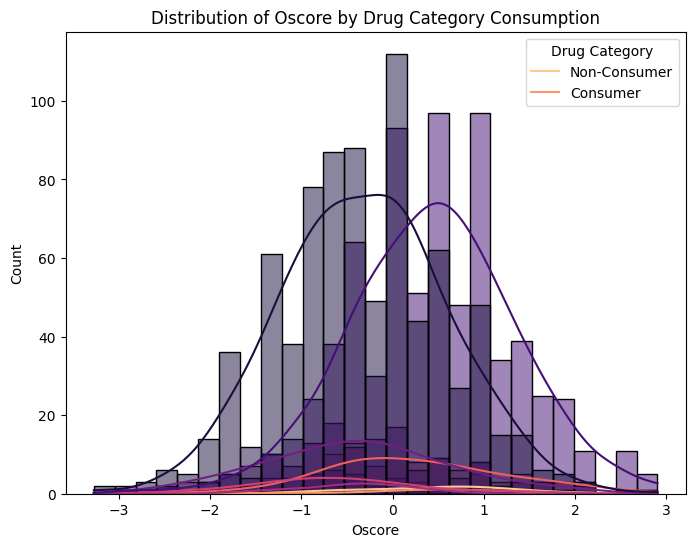

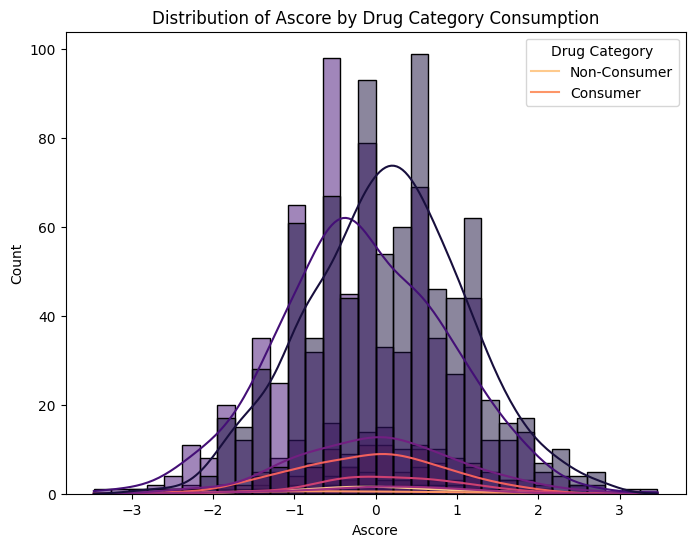

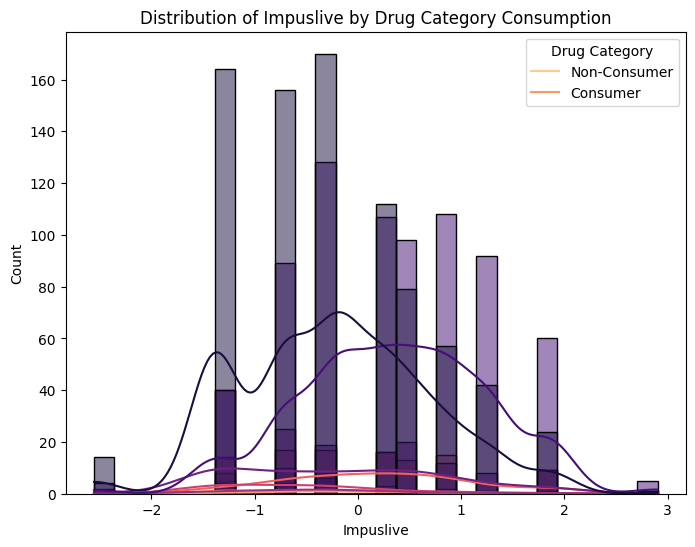

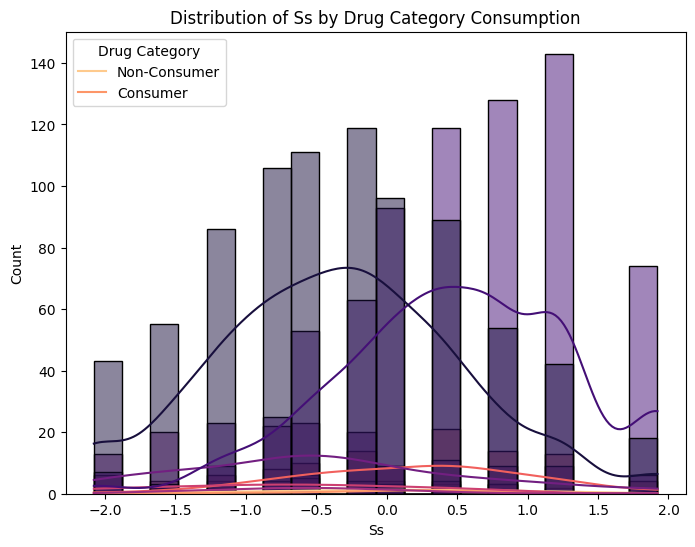

<Figure size 1000x800 with 0 Axes>

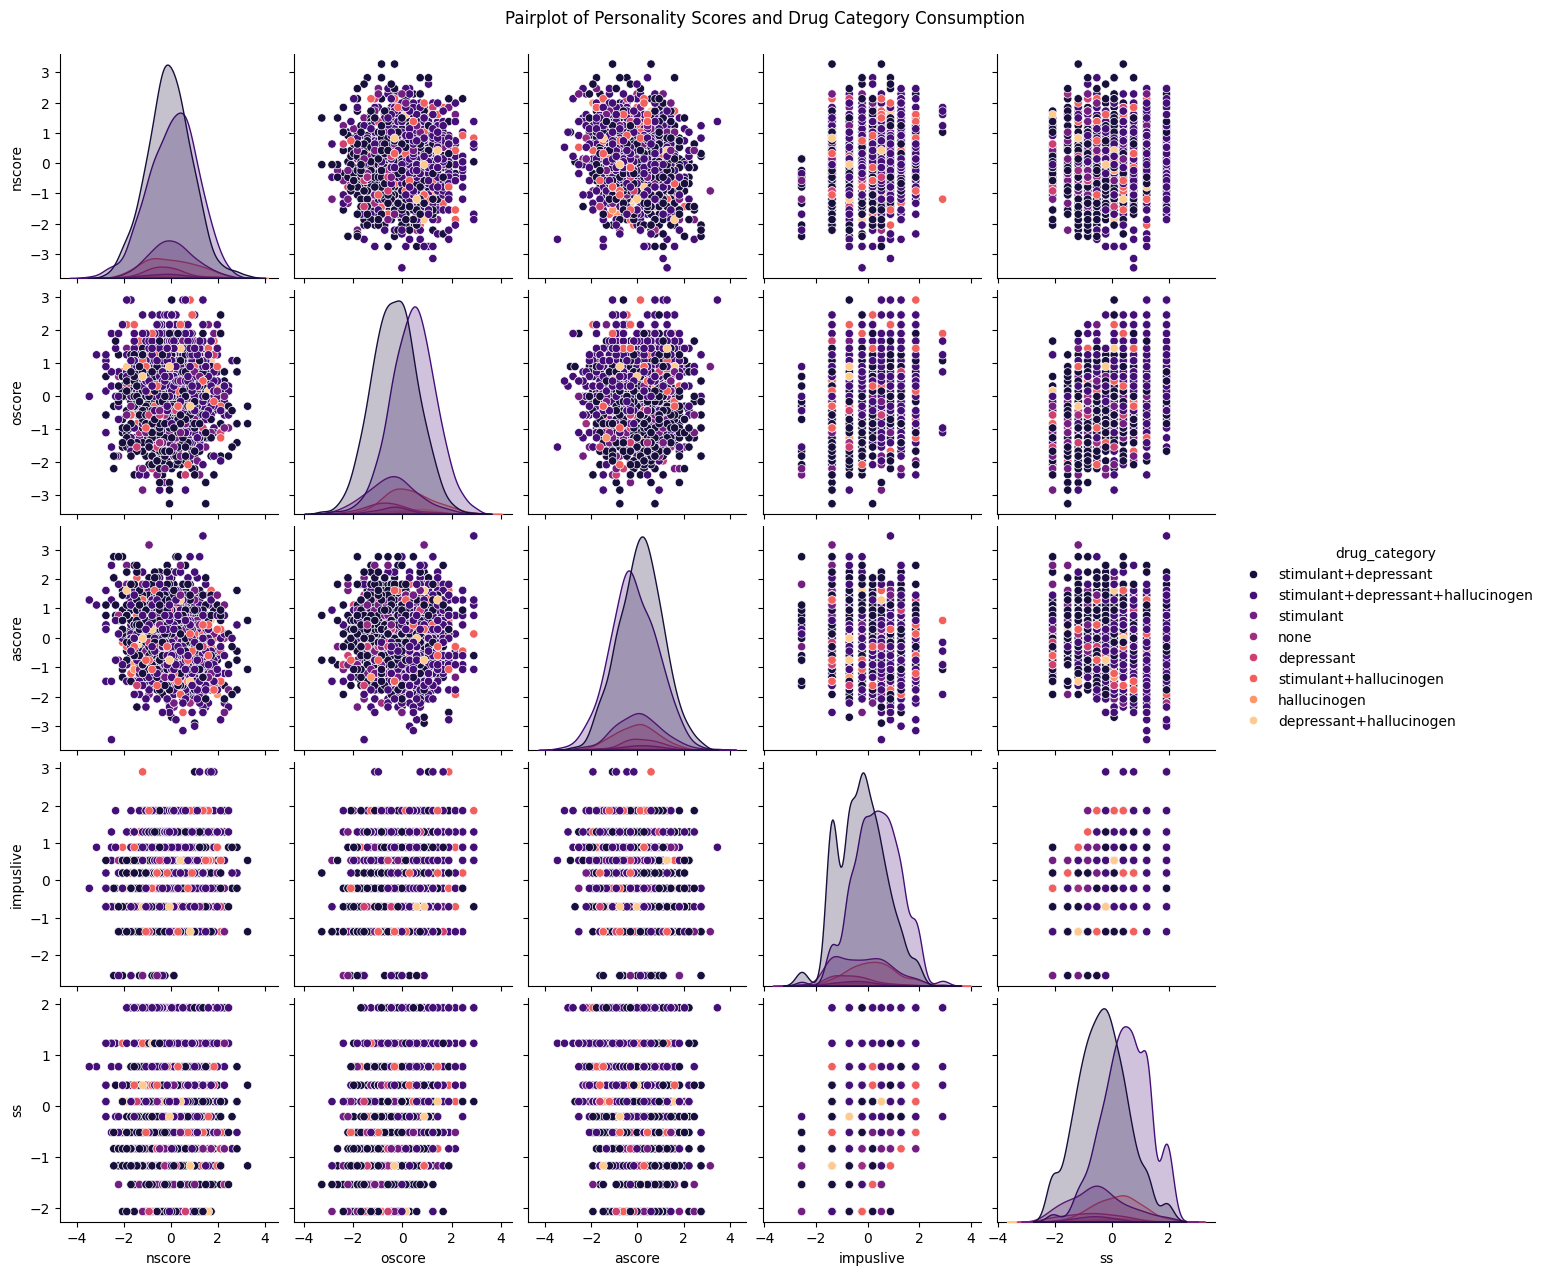

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Selecting relevant columns for visualization
cols_to_visualize = ['nscore', 'oscore', 'ascore', 'impuslive', 'ss', 'drug_category']

# Create separate plots for each personality score
for col in cols_to_visualize[:-1]:  # Exclude 'drug_category' from individual plots
    plt.figure(figsize=(8, 6))
    sns.histplot(data=drug_consumption_df, x=col, hue='drug_category', kde=True, palette='magma')
    plt.title(f'Distribution of {col.capitalize()} by Drug Category Consumption')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Drug Category', labels=['Non-Consumer', 'Consumer'])
    plt.show()

# Pairplot including all variables
plt.figure(figsize=(10, 8))
sns.pairplot(data=drug_consumption_df[cols_to_visualize], hue='drug_category', palette='magma')
plt.suptitle('Pairplot of Personality Scores and Drug Category Consumption', y=1.02)
plt.show()

Step 4 Supervised learning algorithms :  Support Vector Machine


Step 5 Calculate precision, recall, F1, and kernals

In [14]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Initialize SVC with default parameters
svc = SVC(random_state=2)

# Wrap the SVC with MultiOutputClassifier
multi_target_svc = MultiOutputClassifier(svc, n_jobs=-1)

# Train the model
multi_target_svc.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = multi_target_svc.predict(X_train)
y_test_pred = multi_target_svc.predict(X_test)

# Compute precision, recall, and f1-score
precision = []
recall = []
f1 = []

for i in range(y_test.shape[1]):  # Iterate over each column (output dimension)
    precision.append(precision_score(y_test.iloc[:, i], y_test_pred[:, i], average='weighted'))
    recall.append(recall_score(y_test.iloc[:, i], y_test_pred[:, i], average='weighted'))
    f1.append(f1_score(y_test.iloc[:, i], y_test_pred[:, i], average='weighted'))

# Aggregate metrics
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
f1_avg = np.mean(f1)

# Print the evaluation metrics
print("Metrics for MultiOutputClassifier with SVC:")
print("Precision on test set: {:.3f}".format(precision_avg))
print("Recall on test set: {:.3f}".format(recall_avg))
print("F1 Score on test set: {:.3f}".format(f1_avg))

# check for overfitting
train_precision = []
train_recall = []
train_f1 = []

for i in range(y_train.shape[1]):  # Iterate over each column (output dimension)
    train_precision.append(precision_score(y_train.iloc[:, i], y_train_pred[:, i], average='weighted'))
    train_recall.append(recall_score(y_train.iloc[:, i], y_train_pred[:, i], average='weighted'))
    train_f1.append(f1_score(y_train.iloc[:, i], y_train_pred[:, i], average='weighted'))

train_precision_avg = np.mean(train_precision)
train_recall_avg = np.mean(train_recall)
train_f1_avg = np.mean(train_f1)

print("Metrics on training set:")
print("Precision on training set: {:.3f}".format(train_precision_avg))
print("Recall on training set: {:.3f}".format(train_recall_avg))
print("F1 Score on training set: {:.3f}".format(train_f1_avg))

# Evaluate the model with different kernels
for kernel in ['linear', 'poly', 'rbf']:
    evaluate_model(kernel)



Metrics for MultiOutputClassifier with SVC:
Precision on test set: 0.561
Recall on test set: 0.682
F1 Score on test set: 0.615
Metrics on training set:
Precision on training set: 0.547
Recall on training set: 0.663
F1 Score on training set: 0.598


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 5 GridSearch for SVC

In [15]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Define a reduced parameter grid for GridSearchCV
param_grid = {
    'estimator__C': [0.1, 1],  # Reduced parameter range
    'estimator__gamma': [1, 0.1],  # Reduced parameter range
    'estimator__kernel': ['linear', 'rbf']  # Fewer kernels
}

# Initialize SVC
svc = SVC(random_state=2)

# Wrap the SVC with MultiOutputClassifier
multi_target_svc = MultiOutputClassifier(svc, n_jobs=-1)

# Initialize GridSearchCV with the MultiOutputClassifier
grid_search = GridSearchCV(multi_target_svc, param_grid, cv=2, verbose=2, n_jobs=-1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Compute precision, recall, and f1-score for each output dimension
precision = []
recall = []
f1 = []

for i in range(y_test.shape[1]):  # Iterate over each column (output dimension)
    precision.append(precision_score(y_test.iloc[:, i], y_test_pred[:, i], average='weighted'))
    recall.append(recall_score(y_test.iloc[:, i], y_test_pred[:, i], average='weighted'))
    f1.append(f1_score(y_test.iloc[:, i], y_test_pred[:, i], average='weighted'))

# Aggregate metrics
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
f1_avg = np.mean(f1)

# Print the evaluation metrics
print("Metrics for MultiOutputClassifier with SVC:")
print("Precision on test set: {:.3f}".format(precision_avg))
print("Recall on test set: {:.3f}".format(recall_avg))
print("F1 Score on test set: {:.3f}".format(f1_avg))

# check for overfitting
train_precision = []
train_recall = []
train_f1 = []

for i in range(y_train.shape[1]):  # Iterate over each column (output dimension)
    train_precision.append(precision_score(y_train.iloc[:, i], y_train_pred[:, i], average='weighted'))
    train_recall.append(recall_score(y_train.iloc[:, i], y_train_pred[:, i], average='weighted'))
    train_f1.append(f1_score(y_train.iloc[:, i], y_train_pred[:, i], average='weighted'))

train_precision_avg = np.mean(train_precision)
train_recall_avg = np.mean(train_recall)
train_f1_avg = np.mean(train_f1)

print("Metrics on training set:")
print("Precision on training set: {:.3f}".format(train_precision_avg))
print("Recall on training set: {:.3f}".format(train_recall_avg))
print("F1 Score on training set: {:.3f}".format(train_f1_avg))


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Metrics for MultiOutputClassifier with SVC:
Precision on test set: 0.554
Recall on test set: 0.674
F1 Score on test set: 0.608
Metrics on training set:
Precision on training set: 0.538
Recall on training set: 0.654
F1 Score on training set: 0.590


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 4 Supervised learning algorithms :  Random Forest Classifier


Step 5 Calculate precision, recall, and F1

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize RandomForestClassifier with default parameters
forest = RandomForestClassifier(random_state=2)

# Train the model
forest.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Calculate precision, recall, and F1-score for multi-label classification
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')


# Print the evaluation metrics
print("Metrics for RandomForestClassifier with default parameters:")
print("Precision on test set: {:.3f}".format(precision))
print("Recall on test set: {:.3f}".format(recall))
print("F1 Score on test set: {:.3f}".format(f1))


<ipython-input-16-76980569f8d1>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Metrics for RandomForestClassifier with default parameters:
Precision on test set: 0.585
Recall on test set: 0.674
F1 Score on test set: 0.614


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 5 GridSearch for Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state=2)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=2, n_jobs=-1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters found by GridSearchCV:")
print(best_params)
print("Best F1 Score:", best_score)

# Get the worst-performing parameters and score
worst_params = grid_search.cv_results_['params'][np.argmin(grid_search.cv_results_['mean_test_score'])]
worst_score = np.min(grid_search.cv_results_['mean_test_score'])

print("\nWorst Parameters found by GridSearchCV:")
print(worst_params)
print("Worst F1 Score:", worst_score)

# Predict on training and test sets with the best model
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate precision, recall, and F1-score for multi-label classification
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics for the best model
print("\nMetrics for RandomForestClassifier with best parameters:")
print("Precision on test set: {:.3f}".format(precision))
print("Recall on test set: {:.3f}".format(recall))
print("F1 Score on test set: {:.3f}".format(f1))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Parameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.5850046075664795

Worst Parameters found by GridSearchCV:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Worst F1 Score: 0.5704149911985288

Metrics for RandomForestClassifier with best parameters:
Precision on test set: 0.631
Recall on test set: 0.671
F1 Score on test set: 0.609


fitting the best parameters on the model

In [18]:
# Predict on test set (seeing how the best preforming looks on train/test)
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics (precision, recall, F1-score)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print evaluation metrics
print("Metrics for RandomForestClassifier with best parameters:")
print("Precision on test set: {:.3f}".format(precision))
print("Recall on test set: {:.3f}".format(recall))
print("F1 Score on test set: {:.3f}".format(f1))


Metrics for RandomForestClassifier with best parameters:
Precision on test set: 0.631
Recall on test set: 0.671
F1 Score on test set: 0.609


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
